# Calcul Matriciel, Optimisation - correction

Calcul matriciel ([numpy](http://www.numpy.org/)).

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [ ]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

### Exercice 1: Echiquier et Crible d'Erathosthene

* Exercice 1-A Echiquier: Créer une matrice échiquier (des 1 et des 0 alternés) de taille 8x8, de deux façons différentes
    * en vous servant de slices 
    * en vous servant de la fonction [tile](http://docs.scipy.org/doc/numpy/reference/generated/numpy.tile.html#numpy.tile)


In [ ]:
import numpy as np
#Exo1a-1:
chess = np.zeros((8,8), dtype=int)
chess[::2,::2] = 1
chess[1::2,1::2] = 1
print(chess)

#Exo1a-2:
chess2 = np.tile([[1,0],[0,1]], (4,4))
print(chess2)

[[1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]]
[[1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]]


* Exercice 1-B Piège lors d'une extraction 2d:
    * Définir la matrice $M = \left(\begin{array}{ccccc} 1 & 5 & 9 & 13 & 17 \\ 2 & 6 & 10 & 14 & 18 \\ 3 & 7 & 11 & 15 & 19 \\ 4 & 8 & 12 & 16 & 20 \\ \end{array}\right)$
    * En **extraire** la matrice $\left(\begin{array}{ccc} 6 & 18 & 10 \\ 7 & 19 & 11 \\ 5 & 17 & 9 \\ \end{array}\right)$

In [ ]:
#Exo1B:
M = np.arange(1, 21).reshape((4,5), order='F')
print(M)

idx_row = [1, 2, 0]
idx_col = [1, 4, 2]
#the following line is wrong: it create couples from the two lists
print("WRONG:",M[idx_row, idx_col])
print("########")
# first correct way:
print(M[idx_row][:,idx_col])
# we can also use broadcasted indices to create all the couples we want: 
idx = np.ix_(idx_row, idx_col)
print(idx)
print(M[idx])

[[ 1  5  9 13 17]
 [ 2  6 10 14 18]
 [ 3  7 11 15 19]
 [ 4  8 12 16 20]]
WRONG: [ 6 19  9]
########
[[ 6 18 10]
 [ 7 19 11]
 [ 5 17  9]]
(array([[1],
       [2],
       [0]]), array([[1, 4, 2]]))
[[ 6 18 10]
 [ 7 19 11]
 [ 5 17  9]]


* Exercice 1-C Crible d'Erathosthene: On souhaite implémenter un [crible d'Erathosthène](http://fr.wikipedia.org/wiki/Crible_d'%C3%89ratosth%C3%A8ne) pour trouver les nombres premiers inférieurs à $N=1000$.
    * partir d'un array de booléens de taille N+1, tous égaux à True.
    * Mettre 0 et 1 à False car ils ne sont pas premiers
    * pour chaque entier $k$ entre 2 et $\sqrt{N}$: 
        * si $k$ est premier: on passe ses multiples (entre $k^2$ et $N$) à False
    * on print la liste des entiers premiers

In [ ]:
#Exo1c
n = 1001
is_prime = np.ones(n, dtype=bool)
is_prime[:2] = False

for k in range(2, int(np.sqrt(n))+1):
    is_prime[k**2::k] = False
print(np.arange(n)[is_prime])

[  2   3   5   7  11  13  17  19  23  29  31  37  41  43  47  53  59  61
  67  71  73  79  83  89  97 101 103 107 109 113 127 131 137 139 149 151
 157 163 167 173 179 181 191 193 197 199 211 223 227 229 233 239 241 251
 257 263 269 271 277 281 283 293 307 311 313 317 331 337 347 349 353 359
 367 373 379 383 389 397 401 409 419 421 431 433 439 443 449 457 461 463
 467 479 487 491 499 503 509 521 523 541 547 557 563 569 571 577 587 593
 599 601 607 613 617 619 631 641 643 647 653 659 661 673 677 683 691 701
 709 719 727 733 739 743 751 757 761 769 773 787 797 809 811 821 823 827
 829 839 853 857 859 863 877 881 883 887 907 911 919 929 937 941 947 953
 967 971 977 983 991 997]


On remarque que le nombre 6 est barré deux fois car il est multiple de 3 et de 2. Cela signifie que le nombre 6 est barré durant les deux premières itérations. En fait chaque nombre ``k*i`` est nécessaire barré dans une précédente itération si ``i<k``. On remplace donc ``k*i`` par ``k*k`` ou ``k**2``.

In [ ]:
#Exo1c
import numpy as np
n = 1001
is_prime = np.ones(n, dtype=bool)
is_prime[:2] = False
for k in range(2, int(np.sqrt(n))):
    is_prime[k*k::k] = False
print(np.arange(n)[is_prime])

[  2   3   5   7  11  13  17  19  23  29  31  37  41  43  47  53  59  61
  67  71  73  79  83  89  97 101 103 107 109 113 127 131 137 139 149 151
 157 163 167 173 179 181 191 193 197 199 211 223 227 229 233 239 241 251
 257 263 269 271 277 281 283 293 307 311 313 317 331 337 347 349 353 359
 367 373 379 383 389 397 401 409 419 421 431 433 439 443 449 457 461 463
 467 479 487 491 499 503 509 521 523 541 547 557 563 569 571 577 587 593
 599 601 607 613 617 619 631 641 643 647 653 659 661 673 677 683 691 701
 709 719 727 733 739 743 751 757 761 769 773 787 797 809 811 821 823 827
 829 839 853 857 859 863 877 881 883 887 907 911 919 929 937 941 947 953
 961 967 971 977 983 991 997]


### Exercice 2 : marches aléatoires

Simulez (**en une seule fois!**) 10000 marches aléatoires de taille 1000, partant de 0 et de pas +1 ou -1 équiprobables 

* Faites un graphe représentant la racine de la moyenne des carrés des positions (=cumul des pas à un instant donné) en fonction du temps
* Quels sont les amplitudes maximales et minimales atteintes parmi l'ensemble des marches aléatoires?
* Combien de marches s'éloigne de plus de 50 de l'origine?
* Parmi celles qui le font, quelle est la moyenne des temps de passage (i.e. le premier moment où ces marches dépassent +/-50)?

Vous aurez peut-être besoin des fonctions suivantes: [np.abs](http://docs.scipy.org/doc/numpy/reference/generated/numpy.absolute.html), [np.mean](http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html), [np.max](http://docs.scipy.org/doc/numpy/reference/generated/numpy.maximum.html), [np.where](http://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html), [np.argmax](http://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html), [np.any](http://docs.scipy.org/doc/numpy/reference/generated/numpy.any.html), [np.cumsum](http://docs.scipy.org/doc/numpy/reference/generated/numpy.cumsum.html), [np.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html).

In [ ]:
import numpy as np

n_walks = 10000
n_steps = 1000
steps = np.random.randint(0, 2, (n_walks, n_steps))
steps = 2*steps-1 
walks = np.cumsum(steps, axis=1)

# on affiche le premier carré 10x10
walks[:10,:10]

array([[  1,   2,   3,   4,   5,   6,   5,   4,   5,   4],
       [  1,   0,   1,   2,   1,   0,   1,   2,   1,   2],
       [ -1,  -2,  -3,  -4,  -5,  -6,  -7,  -8,  -9, -10],
       [  1,   0,   1,   2,   3,   2,   3,   4,   5,   6],
       [ -1,  -2,  -1,   0,  -1,   0,  -1,   0,  -1,  -2],
       [ -1,   0,   1,   2,   3,   4,   3,   4,   3,   2],
       [ -1,   0,   1,   0,   1,   2,   3,   4,   5,   4],
       [ -1,  -2,  -1,   0,   1,   2,   1,   2,   3,   2],
       [  1,   0,  -1,   0,  -1,  -2,  -3,  -4,  -3,  -4],
       [  1,   0,  -1,   0,   1,   2,   1,   2,   3,   4]], dtype=int32)

Highest position:133	Lowest position:-120
Number of walks over bound(=50):2074
Mean crossing time:673.8341369334619


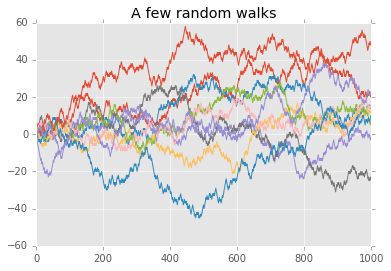

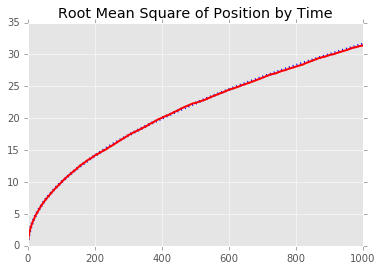

In [ ]:
import matplotlib.pyplot as plt
# let's have a quick look at a few random walks
plt.plot(walks[:10,:].transpose())
plt.title('A few random walks')
# Let's see how the root mean square of the position evolves with time/nb of steps
rms_position = np.sqrt( (walks**2).mean(axis=0) )
plt.figure()
t = 1 + np.arange(len(rms_position))
plt.plot(t, np.sqrt(t), ':b', lw=3) #Just to show the fit 
plt.plot(t, rms_position, '-r', lw=2)
plt.title('Root Mean Square of Position by Time')
# What are the highest/lowest positions 
print('Highest position:{max}\tLowest position:{min}'.format(max=walks.max(), min=walks.min()))
# How many walks wander further than 50?
bound = 50
hits_the_bound = np.any(np.abs(walks)> bound, axis=1) #for each walk, do we go further than the bound at any time?
print('Number of walks over bound(={}):{}'.format(bound, hits_the_bound.sum()))
# Among the walks that go beyond the bound, what is the mean of the first hits?
# we use argmax on the boolean array to get the first True value
first_hits = (np.abs(walks[hits_the_bound,:])>bound).argmax(axis=1)
print('Mean crossing time:{}'.format(first_hits.mean()))

### Exercice 3 : retrouver la série aléatoire à partir des marches aléatoires

Dans cet exercice, on cherche à retrouver la série initiale à partir de la somme cumulée de celle-ci. On veut calculer en quelque sort sa dérivée.

In [ ]:
derivee = walks[:,1:] - walks[:,:-1]
derivee[:10,:10]

array([[ 1,  1,  1,  1,  1, -1, -1,  1, -1,  1],
       [-1,  1,  1, -1, -1,  1,  1, -1,  1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1,  1,  1,  1, -1,  1,  1,  1,  1,  1],
       [-1,  1,  1, -1,  1, -1,  1, -1, -1, -1],
       [ 1,  1,  1,  1,  1, -1,  1, -1, -1,  1],
       [ 1,  1, -1,  1,  1,  1,  1,  1, -1,  1],
       [-1,  1,  1,  1,  1, -1,  1,  1, -1, -1],
       [-1, -1,  1, -1, -1, -1, -1,  1, -1,  1],
       [-1, -1,  1,  1,  1, -1,  1,  1,  1,  1]], dtype=int32)

### Exercice 4 : simulation, régression, estimation par maximisation de la vraisemblance

* On commence par simuler la variable $Y = 3 X_1 -2 X_2 +2 + \epsilon$ où $X_1,X_2,\epsilon \sim \mathcal{N}(0,1)$ 
* On souhaite ensuite retrouver les coefficients dans la [régression linéaire](http://fr.wikipedia.org/wiki/R%C3%A9gression_lin%C3%A9aire) de $Y$ sur $X_1$ et $X_2$ dans un modèle avec constante, par la méthode des Moindres Carrés Ordinaires. On rappelle que la forme matricielle de l'estimateur des MCO est $\hat{\beta} = (X'X)^{-1}X'Y$
* Enfin, $Y$ étant normale, on souhaite estimer ses paramètres par maximisation de vraisemblance:
    * La densité s'écrit: $f(x, \mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi} } e^{ -\frac{(x-\mu)^2}{2\sigma^2} }$
    * La log-vraisemblance: $\ln\mathcal{L}(\mu,\sigma^2) = \sum_{i=1}^n \ln f(x_i;\,\mu,\sigma^2) = -\frac{n}{2}\ln(2\pi) - \frac{n}{2}\ln\sigma^2 - \frac{1}{2\sigma^2}\sum_{i=1}^n (x_i-\mu)^2$ ou encore en divisant par $n$ : $-\frac{1}{2}\ln(2\pi) - \frac{1}{2}\ln\sigma^2 - \frac{1}{2n\sigma^2}\sum_{i=1}^n (x_i-\mu)^2$
    * L'écriture des conditions au premier ordre donne une formule fermée pour les estimateurs du maximum de vraisemblance: $\hat{\mu} = \overline{x} \equiv \frac{1}{n}\sum_{i=1}^n x_i$, $\hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^n (x_i - \overline{x})^2$.
    * Vérifiez en les implémentant directement que vous trouvez bien la même solution que le minimum obtenu en utilisant *scipy.optimize.minimize* pour minimiser l'opposé de la log-vraissemblance.
    
**version matricielle**

In [ ]:
import numpy as np
import math
from scipy.optimize import minimize
n_samples = 100000
x1_x2_eps = np.random.randn(n_samples,3)
y = 3*x1_x2_eps[:,0] - 2*x1_x2_eps[:,1] + 2 + x1_x2_eps[:,2]

X = np.hstack( (x1_x2_eps[:,:2], np.ones((n_samples,1))) )
beta_hat = ( np.linalg.inv((X.T).dot(X)) ).dot( (X.T).dot(y) )
print("coef X1, coef X2, constante")
beta_hat

coef X1, coef X2, constante


array([ 2.99395809, -2.00169881,  2.00215411])

**version scipy**

In [ ]:
def log_likelihood(mu,sigma_square, x):
    return - 0.5 * math.log(sigma_square) - sum((x - mu)**2)/(2*sigma_square) / len(x)

def neg_log_likelihood_vectorielle(theta):
    return -log_likelihood(theta[0],theta[1],y)

theta0 = np.array([2., 14])
optim_res = minimize(neg_log_likelihood_vectorielle, theta0, method='Nelder-Mead')
optim_res

  status: 0
 message: 'Optimization terminated successfully.'
 success: True
     nit: 30
     fun: 1.8165031271016212
    nfev: 57
       x: array([  1.99871699,  13.91551151])

Est-ce bien le résultat attendu :

* $\mathbb{E}Y = 3\mathbb{E}X_1 - 2\mathbb{E}X_2 + 2 + \mathbb{E}\epsilon = 2$
* $\mathbb{V}Y = 9\mathbb{V}X_1 + 4\mathbb{V}X_2 + \mathbb{V}\epsilon = 14$

Toutes les variables sont indépendantes. On vérifie que cela correspond aux réponses cherchées :

In [ ]:
np.mean(y), np.std(y)**2

(1.9987233148817718, 13.91554073655678)

### Exercice 5 :  Optimisation quadratique (sous contraintes) avec cvxopt

voir [correction](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx/notebooks/td1a_correction_session9.html#td1acorrectionsession9rst)